In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import median_abs_deviation
from scipy.optimize import curve_fit

import astropy.units as u

rc = {"font.family" : "serif", 
      "mathtext.fontset" : "cm",
      "font.size" : "14",
      "figure.figsize" : [10,5]}
plt.rcParams.update(rc)

%config InlineBackend.figure_format='retina'

In [145]:
simulation_1 = 'out1.txt'
simulation_2 = 'out2.txt'
simulation_3 = 'out3.txt'
simulation_4 = 'out4.txt'
simulation_5 = 'out5.txt'

file_name = simulation_5

file = open(file_name, 'r')

dim = 3
N_part = int(file.readline()) # read the first line where is written the number of particles
t_0 = file.readline() # read the second line where is written the initial time

file.seek(0) # go back to the beginning of the file

N_lines = len(file.readlines())

print('N_part : ', N_part)
print('initial time : ', t_0)
print('N_lines: ', N_lines)

N_part :  2
initial time :  0.01006967142322244

N_lines:  2000


In [146]:
N_lines_snap = 2+N_part
N_snap = N_lines / N_lines_snap # determine the number of snapshots

print('N snapshot: ', N_snap)

N snapshot:  500.0


In [147]:
N_cols = 7
data = np.empty([int(N_snap), int(N_part), int(N_cols)])
times = np.zeros(int(N_snap))
#masses = np.empty([N_snap, N_part])

for i_snap in range(int(N_snap)):
    initial_line = i_snap * N_lines_snap
    data_init_line = initial_line + 2
    
    times[i_snap] = np.genfromtxt(file_name, skip_header=initial_line+1, max_rows=1)
    #masses[i_snap] = np.genfromtxt(file_name, skip_header=data_init_line, max_rows=N_part, usecols=0)
    values = np.genfromtxt(file_name, skip_header=data_init_line, max_rows=N_part)
    data[i_snap] = values

print(data[0][0])

[ 3.00000000e+01 -4.70572191e-04 -4.97577741e-04  1.00606696e-02
 -9.70399921e-02 -1.05786653e-01  9.97084447e-01]


In [148]:
masses = np.empty([int(N_snap), int(N_part)])
positions = np.empty([int(N_snap), int(N_part), dim])
velocities = np.empty([int(N_snap), int(N_part), dim])

for i in range(int(N_snap)):
    for j in range(int(N_part)):
        masses[i][j] = data[i][j][0]
        positions[i][j] = data[i][j][1:4]
        velocities[i][j] = data[i][j][4:]


In [149]:
positions[:,0,0:2] # takes the position x and y for the first particle for each snapshot

array([[-4.70572191e-04, -4.97577741e-04],
       [-2.10254235e-03, -2.42481787e-03],
       [-3.42403763e-04, -5.25589280e-03],
       [ 3.47302241e-03, -2.43246207e-03],
       [ 5.31415654e-03, -8.53558772e-04],
       [ 6.15112653e-03, -7.67090634e-05],
       [ 6.07426413e-03, -1.60024159e-04],
       [ 5.01100364e-03, -1.34337989e-03],
       [ 2.18336513e-03, -5.50888841e-03],
       [ 8.35543189e-03, -3.50130456e-03],
       [ 1.08799362e-02, -1.43962458e-03],
       [ 1.21417283e-02, -3.04346661e-04],
       [ 1.24498616e-02, -9.08142843e-06],
       [ 1.18510706e-02, -6.48254630e-04],
       [ 1.00188847e-02, -2.86610732e-03],
       [ 1.28072998e-02, -4.79554274e-03],
       [ 1.62358858e-02, -2.18147281e-03],
       [ 1.79459279e-02, -6.97171940e-04],
       [ 1.86480981e-02, -3.96245412e-05],
       [ 1.84720102e-02, -2.24381827e-04],
       [ 1.72467183e-02, -1.60747220e-03],
       [ 1.57686385e-02, -6.61437496e-03],
       [ 2.12728008e-02, -3.14549476e-03],
       [ 2.

from mpl_toolkits import mplot3d

%matplotlib inline
import matplotlib.pyplot as plt


fig = plt.figure()
ax = plt.axes(projection = '3d')
plt.plot(positions[:,0,0], positions[:,0,1], positions[:,0,2])

ax.plot3D(positions[:,0,0], positions[:,0,1], positions[:,0,2])
ax.plot3D(positions[:,1,0], positions[:,1,1], positions[:,1,2])

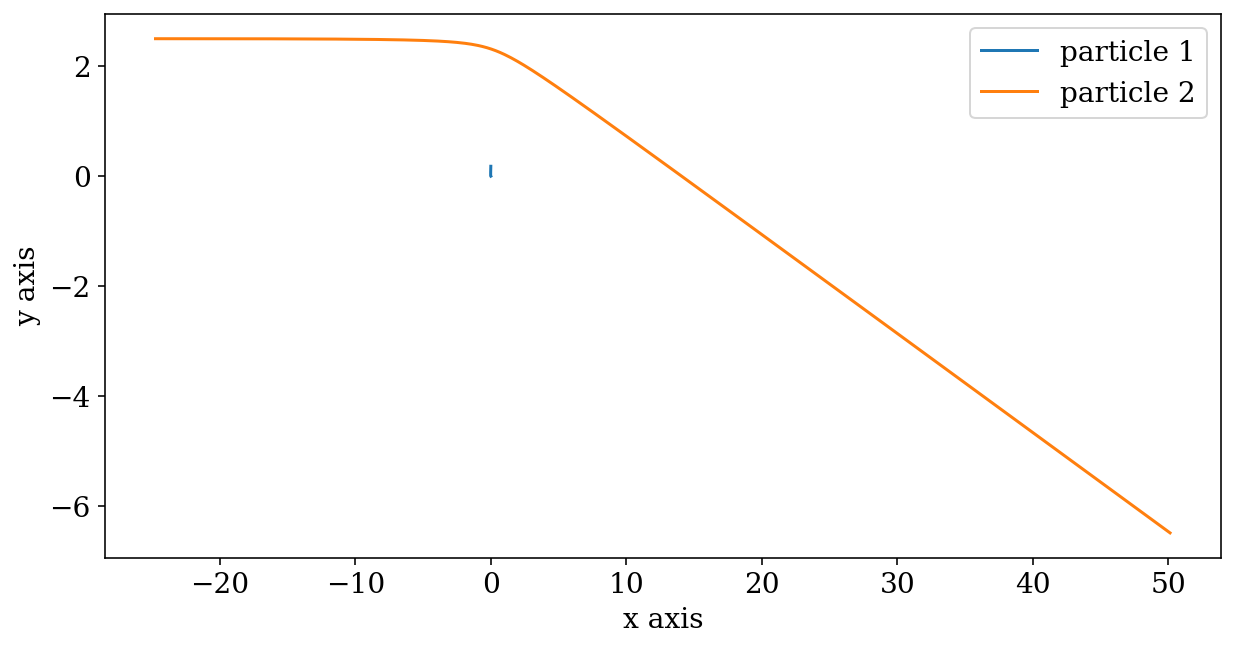

In [51]:
plt.plot(positions[:,0,0], positions[:,0,1], label='particle 1')
plt.plot(positions[:,1,0], positions[:,1,1], label='particle 2')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.legend()